<h> Do NOT run the following blocks </h>

In [10]:
file_path = r"C:/Users/huda/Downloads/part_1.txt"
benchmark_base_path = "C:/Users/huda/Documents/GitHub/scheduling_model/code/external_test_data/FJSSPinstances/"
file = open(file_path, 'r')
file_content = file.readlines()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/huda/Downloads/part_1.txt'

In [ ]:
results_30min = file_content[:402]

In [ ]:
#NOTE: ONLY NEEDED TO BE DONE ONCE TO DIVIDE DATA INTO THE FILES
file_path = r"C:\Users\huda\Downloads\part_2.txt"
file = open(file_path, 'r')
file_content = file.readlines()
results_60min = file_content
target_path = r'C:\Users\huda\Documents\GitHub\scheduling_model\code\reworked_data_model\results\gurobi_results\runs_60min\results.txt'
file = open(target_path, 'a')
for line in results_60min:
    file.write(line)
file.close()

In [ ]:
#NOTE: ONLY NEEDED TO BE DONE ONCE TO DIVIDE DATA INTO THE FILES
# rewrite data

target_path = r'C:\Users\huda\Documents\GitHub\scheduling_model\code\reworked_data_model\results\gurobi_results\runs_30min\results.txt'
file = open(target_path, 'w')
for line in results_30min:
    # TODO: remove x, y, c vectors
    file.write(line)
file.close()
target_path = r'C:\Users\huda\Documents\GitHub\scheduling_model\code\reworked_data_model\results\gurobi_results\runs_60min\results.txt'
file = open(target_path, 'w')
for line in file_content[402:]:
    file.write(line)
file.close()

<h> Run from here</h>

In [11]:
import matplotlib.pyplot as plt

In [12]:
file_path = r"C:/Users/dhutt/Downloads/part_1.txt"
benchmark_base_path = r"C:\Users\dhutt\Desktop\SCHEDULING_MODEL\code\external_test_data\FJSSPinstances\\"
file = open(file_path, 'r')
file_content = file.readlines()

In [13]:
results_30min = file_content[:402]

In [14]:
def read_benchmark_file(source, instance):
    if source.startswith('0'):
        target_file = f'Behnke{instance}.fjs'
    elif source.startswith('1'):
        target_file = f'BrandimarteMk{instance}.fjs'
    elif source.startswith('2a'):
        target_file = f'HurinkSdata{instance}.fjs'
    elif source.startswith('2b'):
        target_file = f'HurinkEdata{instance}.fjs'
    elif source.startswith('2c'):
        target_file = f'HurinkRdata{instance}.fjs'
    elif source.startswith('2d'):
        target_file = f'HurinkVdata{instance}.fjs'
    elif source.startswith('3'):
        target_file = f'DPpaulli{instance}.fjs'
    elif source.startswith('4'):
        target_file = f'ChambersBarnes{instance}.fjs'
    elif source.startswith('5'):
        target_file = f'Kacem{instance}.fjs'
    elif source.startswith('6'):
        target_file = f'Fattahi{instance}.fjs'
    path = benchmark_base_path + f'{source}\\{target_file}'
    return open(path, 'r').readlines()

In [15]:
results = []
success_count = 0
timeout_count = 0
other_limit_count = 0
successful = []
failed = []
for row in results_30min:
    line = dict()
    columns = row.split(';')
    line["source"] = columns[0]
    line["instance"] = int(columns[1])
    line["best_objective"] = float(columns[2])
    line["upper_bound"] = float(columns[3])
    line["lower_bound"] = float(columns[4])
    line["gap"] = float(columns[5])
    line["status"] = int(columns[6])
    line["n_explored"] = int(float(columns[7]))
    line["runtime"] = float(columns[8])
    line["overall_runtime"] = float(columns[9])
    line["setup_time"] = line["overall_runtime"] - line["runtime"]
    # add information about the benchmark instance
    benchmark_file = read_benchmark_file(line["source"], line["instance"])
    benchmark_system = benchmark_file[0].split(' ')
    line["n_machines"] = int(benchmark_system[1])
    line["n_jobs"] = int(benchmark_system[0])
    line["average_workstations_per_operation"] = float(benchmark_system[2])
    jobs = benchmark_file[1:]
    line["n_operations"] = sum([int(x.split(' ')[0]) for x in jobs])
    line["average_operations_per_job"] = line["n_operations"] / line["n_jobs"]
    line["beta_flexibility"] = line["average_workstations_per_operation"]/line["n_machines"]
    line["approximate_max_dissimilarity"] = line["n_operations"] + line["average_operations_per_job"] * line["average_workstations_per_operation"]
    
    results.append(line)
successful = [x for x in results if x["status"] == 2]
failed = [x for x in results if x["status"] != 2]

In [16]:
def average(values):
    return sum(values) / len(values)

In [17]:
n_machines_success = [x["n_machines"] for x in successful]
n_machines_failed = [x["n_machines"] for x in failed]
n_jobs_success = [x["n_jobs"] for x in successful]
n_jobs_failed = [x["n_jobs"] for x in failed]
n_operations_success = [x["n_operations"] for x in successful]
n_operations_failed = [x["n_operations"] for x in failed]
success_beta = [x["beta_flexibility"] for x in successful]
failed_beta = [x["beta_flexibility"] for x in failed]
success_approximated_max_dissimilarity = [x["approximate_max_dissimilarity"] for x in successful]
failed_approximated_max_dissimilarity = [x["approximate_max_dissimilarity"] for x in failed]
print(f'Averages of\tSuccess(n={len(successful)})\t\tFailed(n={len(failed)})')
print(f'# machines:\t{average(n_machines_success)}\t{average(n_machines_failed)}')
print(f'# jobs:\t\t{average(n_jobs_success)}\t{average(n_jobs_failed)}')
print(f'# operations:\t{average(n_operations_success)}\t{average(n_operations_failed)}')
print(f'Flexibility:\t{average(success_beta)}\t{average(failed_beta)}')
print(f'Approx.Max.Dis.:{average(success_approximated_max_dissimilarity)}\t{average(failed_approximated_max_dissimilarity)}')


Averages of	Success(n=166)		Failed(n=236)
# machines:	10.75301204819277	15.453389830508474
# jobs:		9.885542168674698	25.23728813559322
# operations:	89.18072289156626	192.97457627118644
Flexibility:	0.27365994654805786	0.27735930966704997
Approx.Max.Dis.:111.164969879518	220.99678672316375


In [18]:
gap_failed = [x["gap"] for x in failed]
average_gap_failed = average(gap_failed)
print(f"Average Gap in failed runs: {average_gap_failed}")
benchmarks_by_gap = sorted(failed, key=lambda x: x["gap"])
print(f'Max Gap: {benchmarks_by_gap[-1]["gap"]} for instance {benchmarks_by_gap[-1]["source"]}-{benchmarks_by_gap[-1]["instance"]}')
print(f'Min Gap: {benchmarks_by_gap[0]["gap"]} for instance {benchmarks_by_gap[0]["source"]}-{benchmarks_by_gap[0]["instance"]}')



Average Gap in failed runs: 0.39115123202534696
Max Gap: 0.8843441466854631 for instance 0_BehnkeGeiger-60
Min Gap: 0.011494244358202708 for instance 0_BehnkeGeiger-42


In [19]:
success_divided = dict()
failed_divided = dict()
sources = []
for instance in successful:
    if instance["source"] not in success_divided:
        success_divided[instance["source"]] = [x for x in successful if x["source"] == instance["source"]]
        if instance["source"] not in sources:
            sources.append(instance["source"])
for instance in failed:
    if instance["source"] not in failed_divided:
        failed_divided[instance["source"]] = [x for x in failed if x["source"] == instance["source"]]
        if instance["source"] not in sources:
            sources.append(instance["source"])

In [20]:
for source in sources:
    if source not in success_divided:
        print(f'All instances of {source} failed.')
    if source not in failed_divided:
        print(f'All instances of {source} succeeded.')

All instances of 3_DPpaulli failed.


In [21]:
n_success_failed = dict()
for source in sources:
    if source not in n_success_failed:
        n_success_failed[source] = [0, 0]
    if source in success_divided:
        n_success_failed[source][0] = len(success_divided[source])
    if source in failed_divided:
        n_success_failed[source][1] = len(failed_divided[source])

In [22]:
print(f'source\t\t\tsuccess\tfailed\tsuccess/failure\t\t% success\t\t% failed')
for source in sources:
    print(f'{source}(n={sum(n_success_failed[source])})\t{n_success_failed[source][0]}\t{n_success_failed[source][1]}\t{n_success_failed[source][0] / n_success_failed[source][1]}\t{n_success_failed[source][0]/sum(n_success_failed[source])}\t{n_success_failed[source][1]/sum(n_success_failed[source])}')


source			success	failed	success/failure		% success		% failed
0_BehnkeGeiger(n=60)	9	51	0.17647058823529413	0.15	0.85
1_Brandimarte(n=15)	2	13	0.15384615384615385	0.13333333333333333	0.8666666666666667
2a_Hurink_sdata(n=66)	32	34	0.9411764705882353	0.48484848484848486	0.5151515151515151
2b_Hurink_edata(n=66)	35	31	1.1290322580645162	0.5303030303030303	0.4696969696969697
2c_Hurink_rdata(n=66)	24	42	0.5714285714285714	0.36363636363636365	0.6363636363636364
2d_Hurink_vdata(n=66)	27	39	0.6923076923076923	0.4090909090909091	0.5909090909090909
4_ChambersBarnes(n=21)	16	5	3.2	0.7619047619047619	0.23809523809523808
5_Kacem(n=4)	3	1	3.0	0.75	0.25
6_Fattahi(n=20)	18	2	9.0	0.9	0.1
3_DPpaulli(n=18)	0	18	0.0	0.0	1.0


In [24]:
import pandas as pd

df = pd.DataFrame.from_dict(results)

In [29]:
success_df = df.loc[(df['status'] == 2)]
failed_df = df.loc[(df['status'] != 2)]

In [53]:
avg_df = df.groupby('status')
avg_df.mean()

,instance,best_objective,upper_bound,lower_bound,gap,n_explored,runtime,overall_runtime,setup_time,n_machines,n_jobs,average_workstations_per_operation,n_operations,average_operations_per_job,beta_flexibility,approximate_max_dissimilarity
status,,,,,,,,,,,,,,,,
2,31.879518,1312.048193,NaN,0.0,9.745279e-12,3.102387e+05,138.451825,139.122994,0.671169,10.753012,9.885542,2.776446,89.180723,8.379518,0.273660,111.164970
9,25.949153,1277.796609,NaN,0.0,3.911512e-01,2.519314e+06,1800.137432,1805.277060,5.139628,15.453390,25.237288,4.275465,192.974576,8.646398,0.277359,220.996787


In [59]:
avg_df['status'].count()

status
2    166
9    236
Name: status, dtype: int64

In [55]:
avg_df.max()

,source,instance,best_objective,upper_bound,lower_bound,gap,n_explored,runtime,overall_runtime,setup_time,n_machines,n_jobs,average_workstations_per_operation,n_operations,average_operations_per_job,beta_flexibility,approximate_max_dissimilarity
status,,,,,,,,,,,,,,,,,
2,6_Fattahi,66,8312.999999,inf,0.0,1.315799e-09,12855968,1626.839,1627.213518,7.326212,60,15,20.40,225,15.0,1.0,337.5
9,6_Fattahi,60,8002.999998,inf,0.0,8.843441e-01,17674474,1801.889,1862.297116,60.408116,60,100,22.24,500,19.6,1.0,597.5


In [56]:
avg_df.min()

,source,instance,best_objective,upper_bound,lower_bound,gap,n_explored,runtime,overall_runtime,setup_time,n_machines,n_jobs,average_workstations_per_operation,n_operations,average_operations_per_job,beta_flexibility,approximate_max_dissimilarity
status,,,,,,,,,,,,,,,,,
2,0_BehnkeGeiger,1,7.000000,inf,0.0,0.000000,0,0.015,0.015592,-0.000402,2,2,1.0,4,2.000000,0.058824,7.0
9,0_BehnkeGeiger,1,10.999999,inf,0.0,0.011494,31,1800.001,1800.056925,0.046925,4,10,1.0,44,3.733333,0.055556,53.2


In [57]:
avg_df.std()

,instance,best_objective,upper_bound,lower_bound,gap,n_explored,runtime,overall_runtime,setup_time,n_machines,n_jobs,average_workstations_per_operation,n_operations,average_operations_per_job,beta_flexibility,approximate_max_dissimilarity
status,,,,,,,,,,,,,,,,
2,23.246452,1898.049525,NaN,0.0,1.028664e-10,1.399847e+06,337.102533,337.236793,1.363615,8.514826,2.892860,3.264011,51.079533,3.211523,0.212368,64.051694
9,15.800537,1447.210827,NaN,0.0,2.183812e-01,4.299266e+06,0.255472,9.874431,9.640949,15.354324,21.676216,5.069898,121.747451,4.680254,0.152538,132.893372


In [58]:
avg_df.var()

,instance,best_objective,upper_bound,lower_bound,gap,n_explored,runtime,overall_runtime,setup_time,n_machines,n_jobs,average_workstations_per_operation,n_operations,average_operations_per_job,beta_flexibility,approximate_max_dissimilarity
status,,,,,,,,,,,,,,,,
2,540.397517,3.602592e+06,NaN,0.0,1.058150e-20,1.959572e+12,113638.117526,113728.654249,1.859447,72.502264,8.368638,10.653766,2609.118656,10.313881,0.045100,4102.619518
9,249.656978,2.094419e+06,NaN,0.0,4.769037e-02,1.848369e+13,0.065266,97.504397,92.947899,235.755265,469.858348,25.703867,14822.441904,21.904778,0.023268,17660.648243


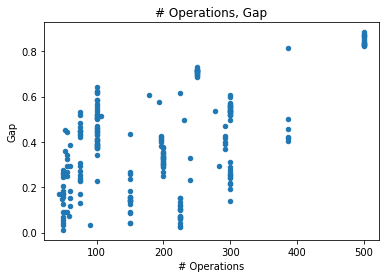

In [72]:
axes = failed_df.plot.scatter(x='n_operations', y='gap')
axes.set_title(f'# Operations, Gap')
axes.set_xlabel(f'# Operations')
axes.set_ylabel(f'Gap')

plt.show()

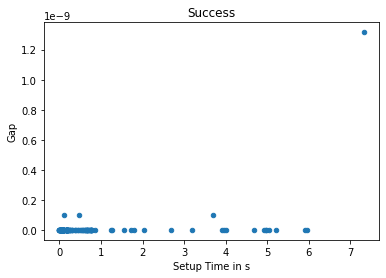

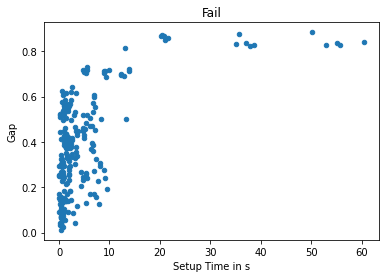

In [76]:
axes = avg_df.plot.scatter(x='setup_time', y='gap')
titles = ['Success', 'Fail']
count = 0
for ax in axes:
    ax.set_title(f'{titles[count]}')
    ax.set_xlabel(f'Setup Time in s')
    ax.set_ylabel(f'Gap')
    count += 1

plt.show()

In [86]:
test = df.groupby(['source', 'status'])
test.mean()

instance  best_objective  upper_bound  lower_bound  \
source           status                                                        
0_BehnkeGeiger   2       23.000000       87.555556          NaN          0.0   
                 9       31.823529      288.450976          NaN          0.0   
1_Brandimarte    2        2.000000      122.000000          NaN          0.0   
                 9        8.923077      319.615384          NaN          0.0   
2a_Hurink_sdata  2       37.937500     2080.156250          NaN          0.0   
                 9       29.323529     1580.588234          NaN          0.0   
2b_Hurink_edata  2       37.342857     1880.285714          NaN          0.0   
                 9       29.161290     1522.709674          NaN          0.0   
2c_Hurink_rdata  2       44.041667     1287.375000          NaN          0.0   
                 9       27.476190     1538.476190          NaN          0.0   
2d_Hurink_vdata  2       43.777778     1149.592593          NaN          0.0   
                 9       26.384615     1545.717949          NaN          0.0   
3_DPpaulli       9        9.500000     2702.500000          NaN          0.0   
4_ChambersBarnes 2        9.000000      938.687500          NaN          0.0   
                 9       17.400000     1180.200000          NaN          0.0   
5_Kacem          2        2.000000        9.666667          NaN          0.0   
                 9        4.000000       10.999999          inf          0.0   
6_Fattahi        2        9.500000      411.611111          NaN          0.0   
                 9       19.500000     1147.000000          NaN          0.0   

                                  gap    n_explored      runtime  \
source           status                                            
0_BehnkeGeiger   2       0.000000e+00  1.938792e+05   725.649556   
                 9       5.800154e-01  1.866373e+05  1800.428882   
1_Brandimarte    2       0.000000e+00  7.363000e+03   162.361500   
                 9       3.826131e-01  2.752484e+05  1800.077615   
2a_Hurink_sdata  2       3.181818e-12  7.202997e+05   166.155375   
                 9       3.155417e-01  5.237540e+06  1800.038853   
2b_Hurink_edata  2       4.331137e-11  4.624247e+05   110.649400   
                 9       3.053258e-01  4.461986e+06  1800.041129   
2c_Hurink_rdata  2       0.000000e+00  1.876546e+04    25.655375   
                 9       3.215902e-01  3.689477e+06  1800.036690   
2d_Hurink_vdata  2       0.000000e+00  7.355556e+02    26.315852   
                 9       3.895751e-01  2.352593e+06  1800.067308   
3_DPpaulli       9       4.415562e-01  1.010872e+05  1800.126722   
4_ChambersBarnes 2       0.000000e+00  2.475248e+05   304.644000   
                 9       1.011279e-01  2.795278e+05  1800.088600   
5_Kacem          2       0.000000e+00  1.000000e+00     0.093667   
                 9       9.090901e-02  7.070480e+05  1800.033000   
6_Fattahi        2       0.000000e+00  3.374942e+05    40.938389   
                 9       1.593203e-01  7.215060e+06  1800.016500   

                         overall_runtime  setup_time  n_machines     n_jobs  \
source           status                                                       
0_BehnkeGeiger   2            726.052316    0.402760   40.000000  10.000000   
                 9           1814.706704   14.277822   40.000000  51.176471   
1_Brandimarte    2            163.322000    0.960500    7.000000  12.500000   
                 9           1801.199077    1.121462    9.461538  21.538462   
2a_Hurink_sdata  2            166.823772    0.668397    8.437500  10.093750   
                 9           1802.213931    2.175078    9.235294  19.147059   
2b_Hurink_edata  2            111.336657    0.687257    8.742857  10.485714   
                 9           1801.925185    1.884056    8.967742  19.580645   
2c_Hurink_rdata  2             26.181933    0.526558   10.000000   9.958333   
                 9           1802.654328    2.6